## Perkenalan

Nama    : I Made Dhanan Pradipta<br>


Objective   : Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 1 dalam konsep Supervised Learning sebagai berikut: <br>

- Mampu memahami konsep supervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning
- Mampu mengimplementasikan supervised learning dengan data yang diberikan
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning

Dataset : [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


---
---
## Import Library

In [106]:
#processing library
import pandas as pd
import numpy as np

#vizualization library
import matplotlib.pylab as plt
import seaborn as sns

#model library preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#model library linear model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import  MultinomialNB
from sklearn.linear_model import SGDClassifier

#model library evaluation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#model library tuning hyperparameter
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

- library dibedakan menjadi beberapa bagian yang memiliki fungsi masing-masing

---
---
## Data Loading

In [44]:
df = pd.read_csv('bank-additional-full.csv', delimiter=';')

- penggunaan dilimiter, dikarenan source data yang masih berantakan, sehingga perlu diberikan pembatas `;`

In [45]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [47]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [48]:
bank_df = df.copy()

#### Note :
1. Data adalah data marketing dari sebuah bank dengan target yaitu `y` : apakah klien akan mengambil deposit atau tidak
2. feature berjumlah 20 dibagi menjadi numerical dan categorical
3. jumlah data yaitu 41188
4. melihat deskripsi dari dataset, terdapat anomali value pada nilai di kolom `duration`, `campaign`, `age`, `pdays`. ini disinyalir bahwa hal tersebut adalah outlier

---
---
## Exploratory Data Analysis (EDA)

#### Step by Step
1. Target analysis
2. Variabel analysis
    - Numerikal
    - Categorikal
3. Cek missing value
4. Cek Outlier

---
#### 1. Target Analysis

target : `depost`, dimana menunjukan keputusan dari klien apakah menyetujui untuk mengajukan deposit atau tidak

In [49]:
bank_df['y'].unique()

array(['no', 'yes'], dtype=object)

In [50]:
bank_df['y'].isnull().sum()

0

In [51]:
bank_df.rename(columns=({'y': 'deposit'}), inplace=True)

  deposit  count
0      no  36548
1     yes   4640


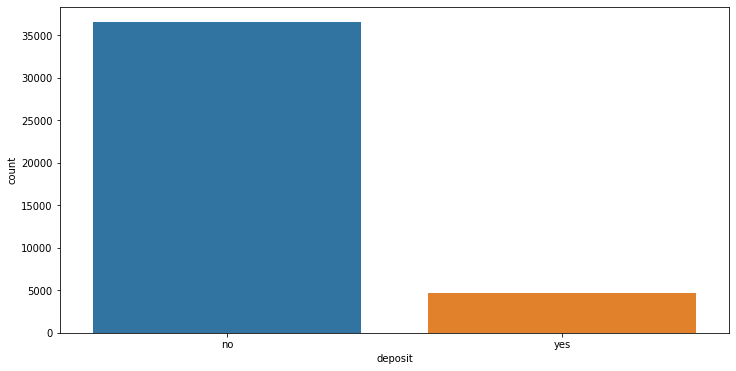

In [52]:
deposit_count = bank_df.groupby('deposit').size().reset_index(name='count')
print(deposit_count)
plt.figure(figsize=(12, 6))
sns.barplot(x='deposit', y='count', data=deposit_count);

#### Note   :
1. Value pada kolom target yaitu `no` berarti tidak mengajukan deposit, dan `yes` yaitu mengajukan deposit
2. nama kolom dirubah menjadi `deposit` sehingga lebih menggambarkan isi dari kolom
3. dari analysis gambar, dapat disimpulkan bahwa dari data tersebut lebih banyak klien tidak mengajukan deposit sebesar 36548

---
#### 2. Variable Analysis

- variable/feature, adalah kolom atau label yang menjadi bahan untuk membuat klasifikasi terhadap deposit

In [53]:
print('999 in column pdays : {} and {} percen of column'.format((bank_df.pdays == 999).sum(), round((bank_df.pdays == 999).sum() * 100 / len(df), 2)))

999 in column pdays : 39673 and 96.32 percen of column


In [54]:
print('nonexistent in column poutcome : {} and {} percen of column'.format((bank_df.poutcome == 'nonexistent').sum(), round((bank_df.poutcome == 'nonexistent').sum() * 100 / len(df), 2)))

nonexistent in column poutcome : 35563 and 86.34 percen of column


In [55]:
bank_df.drop(['duration', 'pdays', 'poutcome'], axis=1, inplace=True)

menurut https://archive.ics.uci.edu/ml/datasets/Bank+Marketing, 
1.  feature `duration` memiliki korelasi yang bersifat highly affect terhadap target, sehingga tidak cocok untuk dijadikan feature yang memprediksi suatu hal
2.  `pdays` adalah banyak hari setelah tim marketing menelepon, namun terdapat nilai yang besar yaitu `999`, yang sebelumnya dianggap outlier, ternyata adalah angka yang mengindikasikan bahwa klien tsb tidak pernah ditlp sebelumnya, dan karena nilai tsb 96% dari data, sehinggi harus didrop
3.  sama seperti kolom pdays, kolom `poutcome` memiliki value `nonexistent` yang berarti tidak terdapat value apapun, karena jumlahnya sangat banyak yaitu 86 percen dari dataset, atau lebih tepatnya berjumlah 355563

sehingga, kolom `duration`, `pdays` dan `poutcome` didrop

In [56]:
bank_df.shape

(41188, 18)

In [57]:
#split column into num and cat type
num_columns = bank_df.select_dtypes(['int64', 'float64']).columns
cat_columns = bank_df.select_dtypes(['object', 'bool']).columns

In [58]:
for col in cat_columns:
    print('{} have {} variables '.format(col, len(bank_df[col].unique())))
    

job have 12 variables 
marital have 4 variables 
education have 8 variables 
default have 3 variables 
housing have 3 variables 
loan have 3 variables 
contact have 2 variables 
month have 10 variables 
day_of_week have 5 variables 
deposit have 2 variables 


- cek cardinality pada kolom categorical dengan melihat jumlah unik value pada tiap kolom

In [59]:
for col in cat_columns:
    print('{} have {} unknown variables'.format(col, bank_df[col].str.contains('unknown').sum()))


job have 330 unknown variables
marital have 80 unknown variables
education have 1731 unknown variables
default have 8597 unknown variables
housing have 990 unknown variables
loan have 990 unknown variables
contact have 0 unknown variables
month have 0 unknown variables
day_of_week have 0 unknown variables
deposit have 0 unknown variables


- setelah dicek, di beberapa kolom menunjukan terdapat value `unknown` yang berarti tidak diketahui, untuk memudahkan dalam proses encode, maka value tsb diubah menjadi `Nan`

In [60]:
#replace column == unknown to Nan value
bank_df[cat_columns] = bank_df[cat_columns].replace('unknown', np.nan)

#### Note :
1.  Terdapat beberapa column yaitu `pdays`, `poutcome` yang memiliki value yang tidak memiliki arti, dengan jumlah banyak, sehingga column tersebut didrop, karena mempengaruhi model classification
2.  Terdapat column `duration` yang menurut refrensi, memiliki korelasi sangat tinggi terhadap target, sehingga jg didrop, karena sangat tidak bagus dalam prediksi model
3.  terdapat value `unknown` yang ada pada column categorical `job`, `marital`, `education`, `default`, `housing`, `loan`, yang tidak memiliki diketahui jelas artinya, sehingga diubah menjadi Nan value, utk memudahkan proses encode

#### Client Analysis

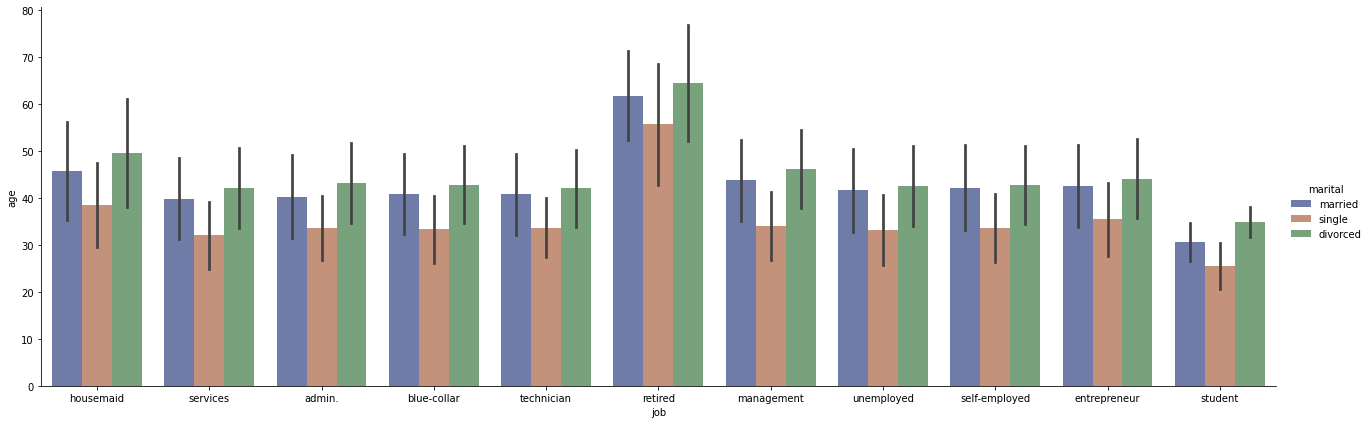

In [61]:
ax = sns.catplot(
    data=bank_df, kind="bar",
    x="job", y="age", hue="marital",
    ci="sd", palette="dark", alpha=.6, height=6, aspect=3)

#### Note   :

1.  Berdasarkan Client analysis menggunakan visualisasi, dapat disimpulkan bahwa client paling banyak sudah berusia lanjut dan sudah pensiun dari pekerjaanya
2.  Rata-rata client berada pada rentang usia 40 - 50 tahun dengan berbagai macam pekerjaan
3.  Kaum muda atau yang berusia dibawah 40 paling sedikit menjadi client
4.  Rata-rata client dengan status menikah atau sudah bercerai berjumlah relatif sama, lebih banyak dibandingkan dengan cliet yang masih single atau belum menikah


In [62]:
time_camp = bank_df.groupby(['month', 'contact']).agg('campaign').count().reset_index()
time_camp.head(10)

,month,contact,campaign
0,apr,cellular,2445
1,apr,telephone,187
2,aug,cellular,5909
3,aug,telephone,269
4,dec,cellular,149
5,dec,telephone,33
6,jul,cellular,6096
7,jul,telephone,1078
8,jun,cellular,820
9,jun,telephone,4498


<AxesSubplot:xlabel='month', ylabel='campaign'>

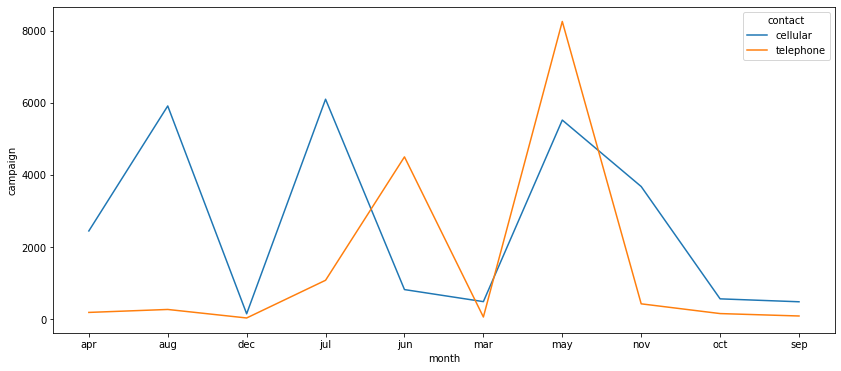

In [63]:
f, ax = plt.subplots(figsize=(14, 6))
sns.lineplot(x="month", y="campaign",
             hue="contact",
             data=time_camp, ci=None)

#### Note   :
1.  Perusahaan sangat berimbang memilih contact antara celular atau telephone
2.  pada awal tahun perusahaan tidak terlalu melakukan kampanye penawaran deposit, namun kemudian semakin gencar pada bulan april dan mei, sempat meredup namun pertengahan tahun juli dan agustus kampanye semakin sering dilakukan oleh perusahaan, dan tidak terlalu aktif kembali sampai akhir tahun yang hanya kira2 400an kampanye utk penawaran deposit terhadap klien

In [64]:
bank_df.describe()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


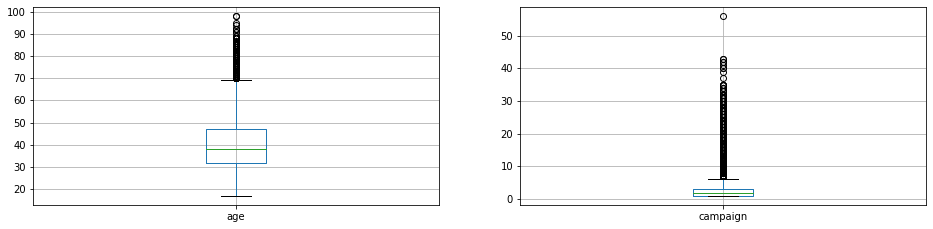

In [65]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
fig = bank_df.boxplot(column='age')

plt.subplot(2, 2, 2)
fig = bank_df.boxplot(column='campaign')

#### Note Check Outlier :
1. berdasarkan anomali data pada antara mean dengan min dan max value pada describe, divisualisasikan kolom kedalam boxplot, dan didapat bahwa column `age` dan `campaign` memiliki oulier

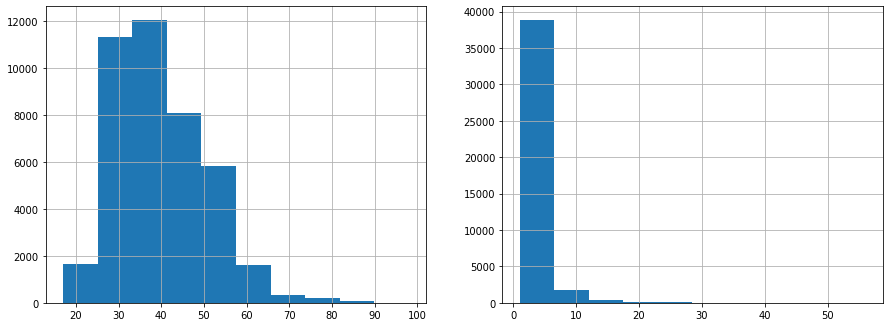

In [66]:
#make visualization of num columns in hist plot
plt.figure(figsize=(15,12))


plt.subplot(2, 2, 1)
fig = bank_df['age'].hist(bins=10)

plt.subplot(2, 2, 2)
fig = bank_df['campaign'].hist(bins=10)



#### Note Skewness :
1. Column `age` dan `campaign` yang memiliki outlier berdasarkan visualisasi boxplot, dicek distribusinya, dan karena kedua column memiliki distribusi right-skewness, maka dalam menghandling outlier digunakan metode IQR

In [67]:
mapping_deposit = bank_df['deposit'].map({'yes': 1, 'no': 0})
num_corr = bank_df[num_columns].join(mapping_deposit)

<AxesSubplot:>

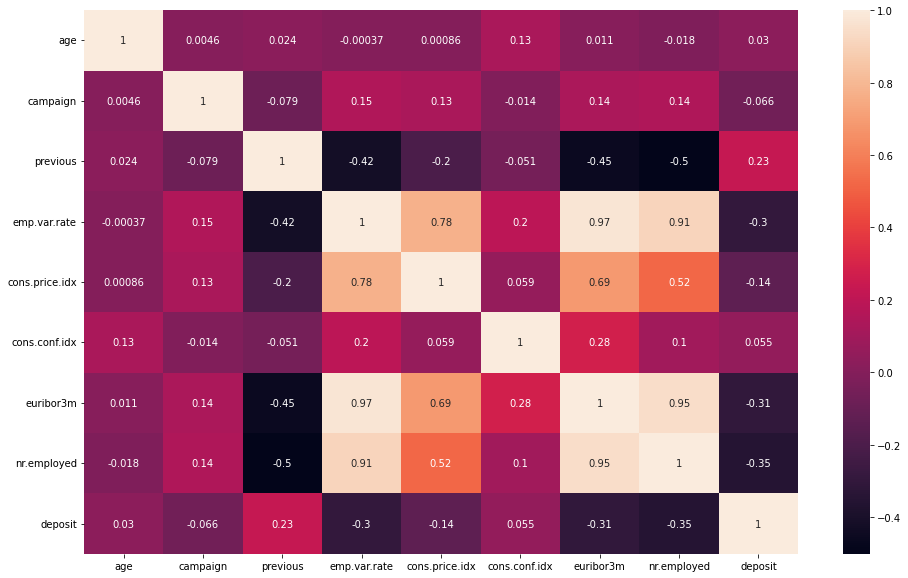

In [68]:
plt.figure(figsize=(16,10))
sns.heatmap(num_corr.corr(),annot=True)

In [69]:
bank_df.drop(['emp.var.rate', 'nr.employed'], axis=1, inplace=True)

#### Note Correlation   :
1.  Antara target `deposit`, sebagian besar column numeric memiliki korelasi terhadap keputusan klien utk mengajukan deposit
2.  Jika dilihat pada nilai korelasi, feature paling lemah yaitu `campaign`, namun jika ditelaah dari domain knowledgenya, menurut pengetahuan peneliti, kampanye kepada klien memiliki pengaruh terhadap keputusan pengajuan deposit oleh klien, begitu juga dengan `age` memiliki pengaruh terhadap target `deposit`
3.  Terdapat korelasi yang tinggi antar feature yaitu:
    - `nr.employed` dgn `euribor3bm` = 0.95
    - `nr.employed` dgn `emp.var.rate` = 0.91
    - `emp.var.rate` dgn `euribor3bm` = 0.97

    Berdasarkan _https://data.oecd.org/emp/employment-rate.htm_ mangatakan bahwa employment variation rate (`emp.var.rate`) adalah ukuran sejauh mana sumber daya tenaga kerja yang tersedia (orang yang tersedia untuk bekerja) digunakan, sehingga menurut peneliti hal ini tidak memiliki hubungan dengan target `deposit` <br>
    begitu juga dengan number of employes (`nr.employed`), yang berarti jumlah dari karyawan, dan kembali menurut peneliti hal tsb tidak memiliki keterkaitan dengan keinginan klien saat mengajukan deposit

---
---
### Data Preprocessing

#### Step by Step   :
1.  Split Train dan test set
2.  Handling missing value
3.  Handling outlier
4.  Scalling
5.  Encoding

---
#### 1. Spliting Data

In [70]:
X = bank_df.drop(['deposit'], axis=1)
y = bank_df['deposit']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [72]:
nume_columns = X.select_dtypes(['int64', 'float64']).columns
categ_columns = X.select_dtypes(['object', 'bool']).columns

---
#### 2. Handling Missing Value

In [73]:
X_train[nume_columns].isnull().sum()

age               0
campaign          0
previous          0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
dtype: int64

In [74]:
X_test[nume_columns].isnull().sum()

age               0
campaign          0
previous          0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
dtype: int64

- tidak terdapat missing value pada column numeric

In [75]:
cat_missing = X_train[categ_columns].isnull().sum()
persen_cat_missing = X_train[categ_columns].isnull().sum() * 100 / len(X_train)

print('Categorical value missing : ', cat_missing)
print('Categorical value missing percentage : ', persen_cat_missing)

Categorical value missing :  job             255
marital          63
education      1384
default        6872
housing         801
loan            801
contact           0
month             0
day_of_week       0
dtype: int64
Categorical value missing percentage :  job             0.773900
marital         0.191199
education       4.200303
default        20.855842
housing         2.430956
loan            2.430956
contact         0.000000
month           0.000000
day_of_week     0.000000
dtype: float64


In [76]:
cat_missing = X_test[categ_columns].isnull().sum()
persen_cat_missing = X_test[categ_columns].isnull().sum() * 100 / len(X_train)

print('Categorical value missing : ', cat_missing)
print('Categorical value missing percentage : ', persen_cat_missing)

Categorical value missing :  job              75
marital          17
education       347
default        1725
housing         189
loan            189
contact           0
month             0
day_of_week       0
dtype: int64
Categorical value missing percentage :  job            0.227618
marital        0.051593
education      1.053111
default        5.235205
housing        0.573596
loan           0.573596
contact        0.000000
month          0.000000
day_of_week    0.000000
dtype: float64


- terdapat beberapa missing value pada kolom kategorikal, dan nantinya akan difill menggunakan metode Mode

---
#### 3. Handling Outlier

In [77]:
def calc_outlier(new_df, col):
    #cari iqr menggunakan quantile 25% dan 75%
    q1 = np.quantile(new_df[col], 0.25)
    q3 = np.quantile(new_df[col], 0.75)
    iqr = q3 - q1

    #cari batas atas dan batas bawah
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    
    print('batas atas dari {} : {} '.format(col, upper))
    print('batas bawah dari {} : {} '.format(col, lower))

    #capping kolom menggunakan batas atas dan batas bawah
    new_df[col] = np.where(
    new_df[col] > upper,
    upper,
    np.where(
        new_df[col] < lower,
        lower,
        new_df[col]
        )
    )



In [78]:
#panggil fungsi
calc_outlier(X_train, 'age')
calc_outlier(X_train, 'campaign')

batas atas dari age : 69.5 
batas bawah dari age : 9.5 
batas atas dari campaign : 6.0 
batas bawah dari campaign : -2.0 


In [79]:
X_train[['age', 'campaign']].describe()

,age,campaign
count,32950.000000,32950.00000
mean,39.936571,2.28088
std,10.134010,1.55459
min,17.000000,1.00000
25%,32.000000,1.00000
50%,38.000000,2.00000
75%,47.000000,3.00000
max,69.500000,6.00000


- outlier yang sudah dideteksi pada bab sebelumnya, yaitu outlier pada `age` dan `campaign`, selanjutnya dihandling menggunakan teknik IQR, dan dicapping terhadap batas atas sehingga outlier terhapuskan

---
#### 4. Feature Selection Using Pipeline

In [80]:
#make pipeline to fill missing value and encode categ_columns using onehotencoder
cat_pipe = Pipeline([
    ('mv', SimpleImputer(strategy="most_frequent", fill_value="missing")),
    ('encoder', OneHotEncoder())
])

- Scaling and Encode using _ColumnTransformer_

In [81]:

preprocessor = ColumnTransformer([
    ('cat', cat_pipe, categ_columns),
    ('num', MinMaxScaler(), nume_columns)
])

#### Note   :
1.  Untuk mengisi Nan value atau missing value, menggunakan library _SimpleImputer_, dengan paramter most_frequent (mode)
2.  Untuk Scaling menggunakan _MinMaxScaler_, yang menscale menjadi 0/1 dikarenakan distribusi dari data train tidak normal, dan juga untuk mempertahankan value dari feature
3.  Encoder menggunakan _OneHotEncoder_ dikarenakan column categorikal sebagian besar bertype nominal

---
---
## Model Definition

In [82]:
#def pipeline_model(model):
def pipeline_model(model):
    pipeline = Pipeline([
        ('prep', preprocessor),
        ('model', model)
    ])
    return pipeline

---
---
## Model Training

In [107]:
logreg = pipeline_model(LogisticRegression())
logreg.fit(X_train, y_train)

svm = pipeline_model(SVC())
svm.fit(X_train, y_train)

dt = pipeline_model(DecisionTreeClassifier())
dt.fit(X_train, y_train)

rfc = pipeline_model(RandomForestClassifier())
rfc.fit(X_train, y_train)

knn = pipeline_model(KNeighborsClassifier())
knn.fit(X_train, y_train)

nb = pipeline_model(MultinomialNB())
nb.fit(X_train, y_train)

sgd = pipeline_model(SGDClassifier())
sgd.fit(X_train, y_train)

C:\Users\danan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('mv',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week'],
      dtype='object')),
                                                 ('num', MinMaxScaler(),
                                                  Index(['age', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m'],
      dtype='object'))])),
                ('model', SGDClassifier

In [84]:
#set name of categorikal columns after encode
cat_enc_name = preprocessor.named_transformers_['cat']['encoder'].get_feature_names(categ_columns)
columns = np.append(cat_enc_name, nume_columns)

C:\Users\danan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [85]:
X_train_val = preprocessor.transform(X_train)


In [86]:
print("---Training-Set---")
display(X_train)
display(pd.DataFrame(preprocessor.transform(X_train), columns=columns))

# Inspect test data before and after
print("---Test data---")
display(X_test)
display(pd.DataFrame(preprocessor.transform(X_test), columns=columns))

---Training-Set---


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m
5285,51.0,technician,married,basic.6y,NaN,yes,yes,telephone,may,fri,1.0,0,93.994,-36.4,4.857
1196,50.0,blue-collar,married,basic.9y,no,yes,no,telephone,may,thu,2.0,0,93.994,-36.4,4.855
33666,29.0,self-employed,single,professional.course,no,yes,no,cellular,may,wed,2.0,1,92.893,-46.2,1.281
29515,42.0,services,married,university.degree,no,yes,no,cellular,apr,mon,6.0,0,93.075,-47.1,1.405
15848,25.0,technician,single,professional.course,no,yes,no,cellular,jul,mon,2.0,0,93.918,-42.7,4.960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40059,58.0,admin.,married,high.school,no,yes,no,cellular,jul,thu,4.0,2,94.215,-40.3,0.810
28017,30.0,admin.,married,university.degree,no,yes,no,cellular,apr,thu,3.0,0,93.075,-47.1,1.483
29199,41.0,unemployed,married,basic.9y,NaN,no,no,cellular,apr,fri,1.0,1,93.075,-47.1,1.405
40061,29.0,admin.,single,high.school,no,yes,no,cellular,jul,thu,1.0,1,94.215,-40.3,0.810


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,age,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.647619,0.0,0.000000,0.698753,0.602510,0.957379
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.628571,0.2,0.000000,0.698753,0.602510,0.956926
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.228571,0.2,0.142857,0.269680,0.192469,0.146679
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.476190,1.0,0.000000,0.340608,0.154812,0.174790
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.152381,0.2,0.000000,0.669135,0.338912,0.980730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.780952,0.6,0.285714,0.784879,0.439331,0.039900
32946,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.247619,0.4,0.000000,0.340608,0.154812,0.192473
32947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.457143,0.0,0.142857,0.340608,0.154812,0.174790
32948,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.228571,0.0,0.142857,0.784879,0.439331,0.039900


---Test data---


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m
29773,38,blue-collar,married,high.school,no,no,no,telephone,apr,mon,1,0,93.075,-47.1,1.405
14070,28,admin.,married,professional.course,no,no,no,cellular,jul,fri,2,0,93.918,-42.7,4.963
39364,58,services,married,high.school,no,no,no,cellular,mar,mon,2,1,93.369,-34.8,0.635
29279,48,services,single,high.school,no,no,no,cellular,apr,fri,3,0,93.075,-47.1,1.405
11888,28,admin.,single,high.school,no,no,no,telephone,jun,fri,16,0,94.465,-41.8,4.959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29225,71,retired,single,NaN,no,yes,no,cellular,apr,fri,3,0,93.075,-47.1,1.405
37798,58,retired,married,high.school,no,no,no,cellular,aug,tue,2,0,92.201,-31.4,0.838
25228,32,admin.,single,university.degree,no,yes,no,cellular,nov,tue,2,1,93.200,-42.0,4.153
23709,41,management,married,university.degree,NaN,yes,no,cellular,aug,thu,1,0,93.444,-36.1,4.962


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,age,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.400000,0.0,0.000000,0.340608,0.154812,0.174790
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.209524,0.2,0.000000,0.669135,0.338912,0.981410
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.780952,0.2,0.142857,0.455183,0.669456,0.000227
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.590476,0.4,0.000000,0.340608,0.154812,0.174790
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.209524,3.0,0.000000,0.882307,0.376569,0.980503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.028571,0.4,0.000000,0.340608,0.154812,0.174790
8234,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.780952,0.2,0.000000,0.000000,0.811715,0.046248
8235,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.285714,0.2,0.142857,0.389322,0.368201,0.797778
8236,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.457143,0.0,0.000000,0.484412,0.615063,0.981183


#### Note Model Training
1.  Training model menggunakan pipeline untuk memudahkan dalam proses modeling
2.  Dataframe di atas adalah perbandingan dari dataframe awal `X_train` dengan datafram yang sudah difeature engineering (handling missing value, outlier, scaling, encoding)

---
---
## Model Evaluation

#### 1. Logistic Regression

In [87]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
score = cross_val_score(logreg, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
score = abs(score)
 
print('Score Accuracy Mean : ', (score).mean())
print('Score Accuracy Std : ', (score).std())

Score Accuracy Mean :  0.8934749620637328
Score Accuracy Std :  0.004821578660573106


In [88]:
y_pred_train_logreg = logreg.predict(X_train)
y_pred_test_logreg = logreg.predict(X_test)

In [89]:
print('accuracy score training - set: {}'. format(accuracy_score(y_train, y_pred_train_logreg)))
print('accuracy score training - set: {}'. format(accuracy_score(y_test, y_pred_test_logreg)))

accuracy score training - set: 0.8938998482549317
accuracy score training - set: 0.891964068948774


In [100]:
print(classification_report(y_test, y_pred_test_logreg))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7310
         yes       0.56      0.19      0.29       928

    accuracy                           0.89      8238
   macro avg       0.73      0.59      0.61      8238
weighted avg       0.87      0.89      0.87      8238



#### Note   :
- Hasil Dari Cros value score menggambarkan tingkat evaluasi dari model dalam setiap fold, dan pada _LogisticRegression_ accuracy meannya yaitu 0.89 dengan Standard Deviasinya 0.004 
- Hasil prediksi dari trainig set yaitu 89% dan test juga 89%, sehingga model tidak ada kemungkinan utk overfitting
- Hasil classification report :
    - Hasil dari precision yaitu 91% positif tidak mengajukan deposit, sedangkan 56% positif mengajukan deposit
    - Hasil dari recall yaitu 98% positif tidak mengajukan dari semua hasil yang sebenernya, sedangkan 19% mengajukan deposit
    - Hasil f1-score rata-rata dari precision dan recall
    - Hasil dari support yaitu 7310 klien tidak mengajukan deposit, dan 928 mengajukan deposit

#### 2. SVM

In [91]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
score = cross_val_score(svm, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
score = abs(score)

print('Score Accuracy Mean : ', (score).mean())
print('Score Accuracy Std : ', (score).std())

Score Accuracy Mean :  0.8952959028831563
Score Accuracy Std :  0.004402176476957522


In [92]:
y_pred_train_svm = svm.predict(X_train)
y_pred_test_svm = svm.predict(X_test)

print('accuracy score training - set: {}'. format(accuracy_score(y_train, y_pred_train_svm)))
print('accuracy score test - set: {}'. format(accuracy_score(y_test, y_pred_test_svm)))

accuracy score training - set: 0.8989984825493171
accuracy score test - set: 0.8908715707696043


In [101]:
print(classification_report(y_test, y_pred_test_svm))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7310
         yes       0.54      0.20      0.29       928

    accuracy                           0.89      8238
   macro avg       0.72      0.59      0.61      8238
weighted avg       0.86      0.89      0.87      8238



- Hasil Dari Cros value score menggambarkan tingkat evaluasi dari model dalam setiap fold, dan pada _LogisticRegression_ accuracy meannya yaitu 0.89 dengan Standard Deviasinya 0.004 
- Hasil prediksi dari trainig set yaitu 89% dan test juga 89%, sehingga model tidak ada kemungkinan utk overfitting
- Hasil classification report :
    - Hasil dari precision yaitu 91% positif tidak mengajukan deposit, sedangkan 54% positif mengajukan deposit
    - Hasil dari recall yaitu 98% positif tidak mengajukan dari semua hasil yang sebenernya, sedangkan 20% mengajukan deposit
    - Hasil f1-score rata-rata dari precision dan recall
    - Hasil dari support yaitu 7310 klien tidak mengajukan deposit, dan 928 mengajukan deposit

#### 3. DecisionTree

In [93]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)

score = cross_val_score(dt, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

score = abs(score)

print('Score Accuracy Mean : ', (score).mean())
print('Score Accuracy Std : ', (score).std())

Score Accuracy Mean :  0.8390591805766313
Score Accuracy Std :  0.0070119358418122245


In [94]:
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

print('accuracy score training - set: {}'. format(accuracy_score(y_train, y_pred_train_dt)))
print('accuracy score test - set: {}'. format(accuracy_score(y_test, y_pred_test_dt)))

accuracy score training - set: 0.9941122913505311
accuracy score test - set: 0.8408594319009468


In [102]:
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

          no       0.91      0.91      0.91      7310
         yes       0.30      0.32      0.31       928

    accuracy                           0.84      8238
   macro avg       0.61      0.61      0.61      8238
weighted avg       0.84      0.84      0.84      8238



- Hasil Dari Cros value score menggambarkan tingkat evaluasi dari model dalam setiap fold, dan pada _LogisticRegression_ accuracy meannya yaitu 0.83 dengan Standard Deviasinya 0.007 
- Hasil prediksi dari trainig set yaitu 99% dan test juga 84%, sehingga model bisa dikatakan underfiting
- Hasil classification report :
    - Hasil dari precision yaitu 91% positif tidak mengajukan deposit, sedangkan 30% positif mengajukan deposit
    - Hasil dari recall yaitu 91% positif tidak mengajukan dari semua hasil yang sebenernya, sedangkan 32% mengajukan deposit
    - Hasil f1-score rata-rata dari precision dan recall
    - Hasil dari support yaitu 7310 klien tidak mengajukan deposit, dan 928 mengajukan deposit

#### 4. RandomForest

In [95]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)

score = cross_val_score(rfc, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

score = abs(score)

print('Score Accuracy Mean : ', (score).mean())
print('Score Accuracy Std : ', (score).std())

Score Accuracy Mean :  0.8868285280728376
Score Accuracy Std :  0.004941300360988851


In [96]:
y_pred_train_rfc = rfc.predict(X_train)
y_pred_test_rfc = rfc.predict(X_test)

print('accuracy score training - set: {}'. format(accuracy_score(y_train, y_pred_train_rfc)))
print('accuracy score test - set: {}'. format(accuracy_score(y_test, y_pred_test_rfc)))

accuracy score training - set: 0.994051593323217
accuracy score test - set: 0.8848021364408837


In [103]:
print(classification_report(y_test, y_pred_test_rfc))

              precision    recall  f1-score   support

          no       0.91      0.96      0.94      7310
         yes       0.48      0.25      0.33       928

    accuracy                           0.88      8238
   macro avg       0.69      0.61      0.63      8238
weighted avg       0.86      0.88      0.87      8238



- Hasil Dari Cros value score menggambarkan tingkat evaluasi dari model dalam setiap fold, dan pada _LogisticRegression_ accuracy meannya yaitu 0.88 dengan Standard Deviasinya 0.004
- Hasil prediksi dari trainig set yaitu 99% dan test juga 88%, sehingga model ada kemungkinan underfitting
- Hasil classification report :
    - Hasil dari precision yaitu 91% positif tidak mengajukan deposit, sedangkan 56% positif mengajukan deposit
    - Hasil dari recall yaitu 98% positif tidak mengajukan dari semua hasil yang sebenernya, sedangkan 19% mengajukan deposit
    - Hasil f1-score rata-rata dari precision dan recall
    - Hasil dari support yaitu 7310 klien tidak mengajukan deposit, dan 928 mengajukan deposit

#### 5. KNN

In [97]:
pipeline_model(KNeighborsClassifier()).fit(X_train, y_train)

cv = KFold(n_splits=10, shuffle=True, random_state=1)

score = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

score = abs(score)

print('Score Accuracy Mean : ', (score).mean())
print('Score Accuracy Std : ', (score).std())

Score Accuracy Mean :  0.8822154779969651
Score Accuracy Std :  0.00568985328284745


In [104]:
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

print('accuracy score training - set: {}'. format(accuracy_score(y_train, y_pred_train_knn)))
print('accuracy score test - set: {}'. format(accuracy_score(y_test, y_pred_test_knn)))

accuracy score training - set: 0.9051593323216995
accuracy score test - set: 0.8840738043214372


In [105]:
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

          no       0.90      0.97      0.94      7310
         yes       0.46      0.17      0.25       928

    accuracy                           0.88      8238
   macro avg       0.68      0.57      0.59      8238
weighted avg       0.85      0.88      0.86      8238



- Hasil Dari Cros value score menggambarkan tingkat evaluasi dari model dalam setiap fold, dan pada _LogisticRegression_ accuracy meannya yaitu 0.88 dengan Standard Deviasinya 0.005 
- Hasil prediksi dari trainig set yaitu 99% dan test juga 88%, sehingga model tidak ada kemungkinan utk overfitting
- Hasil classification report :
    - Hasil dari precision yaitu 90% positif tidak mengajukan deposit, sedangkan 46% positif mengajukan deposit
    - Hasil dari recall yaitu 97% positif tidak mengajukan dari semua hasil yang sebenernya, sedangkan 17% mengajukan deposit
    - Hasil f1-score rata-rata dari precision dan recall
    - Hasil dari support yaitu 7310 klien tidak mengajukan deposit, dan 928 mengajukan deposit

#### 6. Naive-Bayes

In [108]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)

score = cross_val_score(nb, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

score = abs(score)

print('Score Accuracy Mean : ', (score).mean())
print('Score Accuracy Std : ', (score).std())

Score Accuracy Mean :  0.8851593323216995
Score Accuracy Std :  0.005349008276022634


In [109]:
y_pred_train_nb = nb.predict(X_train)
y_pred_test_nb = nb.predict(X_test)

print('accuracy score training - set: {}'. format(accuracy_score(y_train, y_pred_train_nb)))
print('accuracy score test - set: {}'. format(accuracy_score(y_test, y_pred_test_nb)))

accuracy score training - set: 0.8853414264036419
accuracy score test - set: 0.8828599174556931


In [110]:
print(classification_report(y_test, y_pred_test_nb))

              precision    recall  f1-score   support

          no       0.91      0.97      0.94      7310
         yes       0.46      0.21      0.29       928

    accuracy                           0.88      8238
   macro avg       0.68      0.59      0.61      8238
weighted avg       0.86      0.88      0.86      8238



- Hasil Dari Cros value score menggambarkan tingkat evaluasi dari model dalam setiap fold, dan pada _LogisticRegression_ accuracy meannya yaitu 0.88 dengan Standard Deviasinya 0.005 
- Hasil prediksi dari trainig set yaitu 88% dan test juga 88%, sehingga model tidak ada kemungkinan utk overfitting
- Hasil classification report :
    - Hasil dari precision yaitu 91% positif tidak mengajukan deposit, sedangkan 46% positif mengajukan deposit
    - Hasil dari recall yaitu 97% positif tidak mengajukan dari semua hasil yang sebenernya, sedangkan 21% mengajukan deposit
    - Hasil f1-score rata-rata dari precision dan recall
    - Hasil dari support yaitu 7310 klien tidak mengajukan deposit, dan 928 mengajukan deposit

#### 7. Stochastic Gradient Descent (SGD)

In [112]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)

score = cross_val_score(sgd, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

score = abs(score)

print('Score Accuracy Mean : ', (score).mean())
print('Score Accuracy Std : ', (score).std())

Score Accuracy Mean :  0.8941122913505313
Score Accuracy Std :  0.005028145595512044


In [113]:
y_pred_train_sgd = sgd.predict(X_train)
y_pred_test_sgd = sgd.predict(X_test)

print('accuracy score training - set: {}'. format(accuracy_score(y_train, y_pred_train_sgd)))
print('accuracy score test - set: {}'. format(accuracy_score(y_test, y_pred_test_sgd)))

accuracy score training - set: 0.8933535660091046
accuracy score test - set: 0.8868657441126487


In [114]:
print(classification_report(y_test, y_pred_test_sgd))

              precision    recall  f1-score   support

          no       0.91      0.97      0.94      7310
         yes       0.50      0.24      0.33       928

    accuracy                           0.89      8238
   macro avg       0.70      0.61      0.63      8238
weighted avg       0.86      0.89      0.87      8238



- Hasil Dari Cros value score menggambarkan tingkat evaluasi dari model dalam setiap fold, dan pada _LogisticRegression_ accuracy meannya yaitu 0.89 dengan Standard Deviasinya 0.005
- Hasil prediksi dari trainig set yaitu 89% dan test juga 88%, sehingga model tidak ada kemungkinan utk overfitting
- Hasil classification report :
    - Hasil dari precision yaitu 91% positif tidak mengajukan deposit, sedangkan 50% positif mengajukan deposit
    - Hasil dari recall yaitu 97% positif tidak mengajukan dari semua hasil yang sebenernya, sedangkan 24% mengajukan deposit
    - Hasil f1-score rata-rata dari precision dan recall
    - Hasil dari support yaitu 7310 klien tidak mengajukan deposit, dan 928 mengajukan deposit

---
#### Evaluation Report

In [119]:
data = {'logreg': {'cross_val_mean' : 0.89, 'cross_val_std' : 0.004, 'prec (no, yes)': (91, 56), 'recall (no, yes)': (98, 19), 'acc_test' :0.89, },
        'svm': {'cross_val_mean' : 0.89, 'cross_val_std' : 0.004, 'prec (no, yes)': (91, 54), 'recall (no, yes)': (98, 20), 'acc_test' :0.89 },
        'dt': {'cross_val_mean' : 0.83, 'cross_val_std' : 0.007, 'prec (no, yes)': (91, 30), 'recall (no, yes)': (91, 32), 'acc_test' :0.84 },
        'rfc': {'cross_val_mean' : 0.88, 'cross_val_std' : 0.004, 'prec (no, yes)': (91, 48), 'recall (no, yes)': (98, 25), 'acc_test' :0.88 },
        'knn': {'cross_val_mean' : 0.88, 'cross_val_std' : 0.005, 'prec (no, yes)': (90, 46), 'recall (no, yes)': (97, 17), 'acc_test' :0.88 },
        'nb': {'cross_val_mean' : 0.88, 'cross_val_std' : 0.005, 'prec (no, yes)': (91, 46), 'recall (no, yes)': (97, 21), 'acc_test' :0.88},
        'sgd': {'cross_val_mean' : 0.89, 'cross_val_std' : 0.005, 'prec (no, yes)': (91, 50), 'recall (no, yes)': (97, 24), 'acc_test' :0.88 }
}

pd.DataFrame(data)

,logreg,svm,dt,rfc,knn,nb,sgd
cross_val_mean,0.89,0.89,0.83,0.88,0.88,0.88,0.89
cross_val_std,0.004,0.004,0.007,0.004,0.005,0.005,0.005
prec,"(91, 56)","(91, 54)","(91, 30)","(91, 48)","(90, 46)","(91, 46)","(91, 50)"
recall,"(98, 19)","(98, 20)","(91, 32)","(98, 25)","(97, 17)","(97, 21)","(97, 24)"
acc_test,0.89,0.89,0.84,0.88,0.88,0.88,0.88


#### Note   :

1. Berdasarkan cross Value Score, terdapat 3 buah model yang memiliki score yang sama yaitu _LogisticRegression_, _SVM_ dan _SGDClassifier_
2. Berdasarkan Standar deviasinya, nilai paling kecil yaitu terdapat pada 3 buah model yaitu _LogisticRegression_, _SVM_ dan _RFC_

Kesimpulanya, dapat dikatakan bahwa _LogisticRegression_ dan _SVM_ tidak terlalu memiliki nilai akurasi yang jauh berbeda, sehingga untuk menjadi model yang paling baik untuk mengklasifikasikan apakah klien berkeinginan utk mengajukan deposit atau tidak yaitu _LogisticRegression_ dan _SVM_ 

---
#### Tuning Hyperparameter

untuk penentuan hyperparamter yaitu dicobakan menggunakan _LogisticRegression_ dengan menggunakan  `StratifiedKFold` dibandingkan `KFold` karena lebih cocok utk memproses classification pada class yang terdistribusi tidak normal.

In [115]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 1.0, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_val, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.893677 using {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.893667 (0.003360) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.893677 (0.003306) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.893667 (0.003360) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.893586 (0.003281) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.893566 (0.003262) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.893576 (0.003287) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.888376 (0.001107) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.888376 (0.001107) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.888225 (0.001194) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


Didapat bahwa hyperparamter terbaik, jika dicari menggunakan _GridSearchCV_ adlah dengan nilai C=100, solver = 'lgfgs'

In [120]:
model = SVC()
kernel = ['poly', 'rbf']
C = [1.0, 0.01]
gamma = ['scale']

# define grid search
grid = dict(kernel=kernel,C=C)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_val, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.895094 using {'C': 1.0, 'kernel': 'poly'}


---
#### Pengujian Menggunakan Hyperparamter C=100

In [116]:
logreg100 = pipeline_model(LogisticRegression(C=100, penalty='l2', solver='lbfgs'))
logreg100.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('mv',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week'],
      dtype='object')),
                                                 ('num', MinMaxScaler(),
                                                  Index(['age', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m'],
      dtype='object'))])),
                ('model', LogisticRegre

In [117]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)

score = cross_val_score(logreg100, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

score = abs(score)

print('Score Accuracy Mean : ', (score).mean())
print('Score Accuracy Std : ', (score).std())

Score Accuracy Mean :  0.8936570561456753
Score Accuracy Std :  0.004744939928665996


In [124]:
logreg100.predict(X_test)[0:10]

array(['no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no'],
      dtype=object)

In [122]:
y_pred_prob = logreg100.predict_proba(X_test)[0:10]
y_pred_prob

array([[0.91333721, 0.08666279],
       [0.92882975, 0.07117025],
       [0.32128301, 0.67871699],
       [0.85310952, 0.14689048],
       [0.97647744, 0.02352256],
       [0.91718662, 0.08281338],
       [0.95589466, 0.04410534],
       [0.96093878, 0.03906122],
       [0.82673527, 0.17326473],
       [0.97387891, 0.02612109]])

In [123]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Proba - Dont Take Term of Deposit (0)', 'Proba - Take Term of Deposit (1)'])

y_pred_prob_df

,Proba - Dont Take Term of Deposit (0),Proba - Take Term of Deposit (1)
0,0.913337,0.086663
1,0.928830,0.071170
2,0.321283,0.678717
3,0.853110,0.146890
4,0.976477,0.023523
5,0.917187,0.082813
6,0.955895,0.044105
7,0.960939,0.039061
8,0.826735,0.173265
9,0.973879,0.026121


In [127]:
from sklearn.metrics import roc_auc_score

y_pred_class1 = logreg.predict_proba(X_test)[:,1]
y_pred_class100 = logreg100.predict_proba(X_test)[:,1]

ROC_AUC = roc_auc_score(y_test, y_pred_class1)
ROC_AUC100 = roc_auc_score(y_test, y_pred_class100)

print('ROC AUC : {:.4f}'.format(ROC_AUC))
print('ROC AUC100  : {:.4f}'.format(ROC_AUC100))

ROC AUC : 0.7711
ROC AUC100  : 0.7710


#### Note   :

1.  Accuracy Score mean menggunakan cross_val_score pada logreg C=1 : 0.89347
2.  Accuracy Score mean menggunakan cross_val_score pada logreg C=100 : 0.89365
3.  Class Probability 
    - Proba > 0.5 diprediksi bahwa client akan mengajukan deposit (Class 1)
    - Proba < 0.5 diprediksi bahwa client tidak akan mengajukan deposit (Class 0)
4.  ROC AUC menilai performa dari model classifier yang kita gunakan, dari nilai diatas secara value lebih besar model logreg dengan paramter default, namun hanya 0.0001
5.  ROC AUC menjelaskan bahwa semakin nilai mendekati 1, semakin bagus, itu berarti bahwa model yang kita buat sudah bisa memprediksi apakah client berkeinginan mengajukan deposit atau tidak

Dapat disimpulkan bahwa, ketika dituning hyperparamternya, terdapat sedikit peningkatan terhadap accuracy meanya, 

---
---
## Model Inference

model inference bertujuan untuk mengetest lagi model yang sudah dibuat menggunakan data sampel secara acak, yang dipilih dengan jumlah tertentu, tanpa melewati proses training

In [130]:
#pick ten sample from dataset to make data inference
data_inf = bank_df.sample(10, random_state=10)

In [131]:
data_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,deposit
29773,38,blue-collar,married,high.school,no,no,no,telephone,apr,mon,1,0,93.075,-47.1,1.405,no
14070,28,admin.,married,professional.course,no,no,no,cellular,jul,fri,2,0,93.918,-42.7,4.963,no
39364,58,services,married,high.school,no,no,no,cellular,mar,mon,2,1,93.369,-34.8,0.635,yes
29279,48,services,single,high.school,no,no,no,cellular,apr,fri,3,0,93.075,-47.1,1.405,no
11888,28,admin.,single,high.school,no,no,no,telephone,jun,fri,16,0,94.465,-41.8,4.959,no
18359,36,unemployed,married,university.degree,no,no,no,cellular,jul,thu,2,0,93.918,-42.7,4.968,no
12326,41,entrepreneur,married,basic.4y,no,no,no,telephone,jul,fri,1,0,93.918,-42.7,4.959,no
21133,35,technician,married,professional.course,no,yes,yes,cellular,aug,mon,4,0,93.444,-36.1,4.963,yes
28999,35,blue-collar,married,NaN,no,no,no,cellular,apr,fri,1,0,93.075,-47.1,1.405,no
929,36,services,married,high.school,NaN,yes,no,telephone,may,wed,2,0,93.994,-36.4,4.856,no


In [132]:
data_inf_test = data_inf.copy()

In [133]:
#split data inference into num and cat columns
inf_num = data_inf_test.select_dtypes(['int64', 'float64']).columns
inf_cat = data_inf_test.select_dtypes(['object', 'bool']).columns

In [134]:
data_inf_test[inf_num].describe()

,age,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,38.300000,3.400000,0.100000,93.625100,-41.850000,3.45180
std,9.031427,4.526465,0.316228,0.483633,4.682414,1.94033
min,28.000000,1.000000,0.000000,93.075000,-47.100000,0.63500
25%,35.000000,1.250000,0.000000,93.148500,-46.000000,1.40500
50%,36.000000,2.000000,0.000000,93.681000,-42.700000,4.90750
75%,40.250000,2.750000,0.000000,93.918000,-37.750000,4.96200
max,58.000000,16.000000,1.000000,94.465000,-34.800000,4.96800


- Check and handling Missing value from Data Inference

In [135]:
data_inf_test[inf_num].isnull().sum()

age               0
campaign          0
previous          0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
dtype: int64

In [136]:
data_inf_test[inf_cat].isnull().sum()

job            0
marital        0
education      1
default        1
housing        0
loan           0
contact        0
month          0
day_of_week    0
deposit        0
dtype: int64

In [137]:
#fill missing value in categorical using mode method
for col in data_inf_test[inf_cat]:
    fill_mode = data_inf_test[col].mode()
    data_inf_test[col].fillna(fill_mode[0], inplace=True)

- Check and handling outlier

Text(0, 0.5, 'Age')

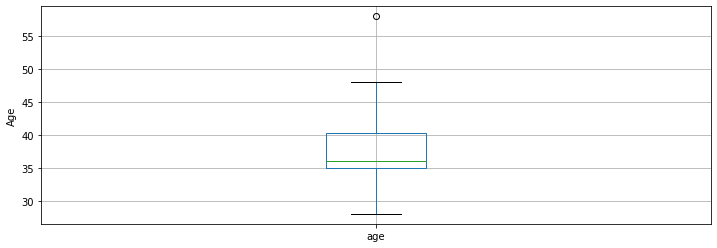

In [142]:
plt.figure(figsize=(12,4))
fig = data_inf_test[inf_num].boxplot(column='age')
fig.set_title('')
fig.set_ylabel('Age')



- terdapat 1 buah outlier pada column `age`, namun secara domain knowledge, memang masih ada org yang berumur 58 tahun utk mengajukan deposit, sehingga outlier tidak perlu dihapus

- Data Inference processing (Encode dan Scale)

In [143]:
data_inf_final = preprocessor.transform(data_inf_test)

In [144]:
pd.DataFrame(data_inf_final)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.400000,0.0,0.000000,0.340608,0.154812,0.174790
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.209524,0.2,0.000000,0.669135,0.338912,0.981410
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.780952,0.2,0.142857,0.455183,0.669456,0.000227
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.590476,0.4,0.000000,0.340608,0.154812,0.174790
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.209524,3.0,0.000000,0.882307,0.376569,0.980503
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.361905,0.2,0.000000,0.669135,0.338912,0.982544
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.457143,0.0,0.000000,0.669135,0.338912,0.980503
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.342857,0.6,0.000000,0.484412,0.615063,0.981410
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.342857,0.0,0.000000,0.340608,0.154812,0.174790
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.361905,0.2,0.000000,0.698753,0.602510,0.957153


- Model Inference Predict Using LogisticRegression

In [145]:
y_pred_inf = logreg100.predict(data_inf_test)

In [146]:
pd.DataFrame(y_pred_inf, data_inf['deposit'], columns=['deposit - Inference_predict']).reset_index()


,deposit,deposit - Inference_predict
0,no,no
1,no,no
2,yes,yes
3,no,no
4,no,no
5,no,no
6,no,no
7,yes,no
8,no,no
9,no,no


#### Note   :
1.  Berdasarkan perbandingan dari data target asli dengan prediksi yang dihasilkan oleh Model Inference, didapat bahwa dari 10 sampel 9 diantaranya benar, sehingga persentase prediksi mencapai 90%